In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore") 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Salary_Data.csv",na_values="?")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
!pip uninstall pandas_profiling
!pip install pandas_profiling

Found existing installation: pandas-profiling 1.4.1
Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrap

In [7]:
X = data.loc[:, data.columns != 'salary'].values
Y = data.iloc[:,-1].values

In [8]:
X

array([[1.10000e+00, 3.93430e+04],
       [1.30000e+00, 4.62050e+04],
       [1.50000e+00, 3.77310e+04],
       [2.00000e+00, 4.35250e+04],
       [2.20000e+00, 3.98910e+04],
       [2.90000e+00, 5.66420e+04],
       [3.00000e+00, 6.01500e+04],
       [3.20000e+00, 5.44450e+04],
       [3.20000e+00, 6.44450e+04],
       [3.70000e+00, 5.71890e+04],
       [3.90000e+00, 6.32180e+04],
       [4.00000e+00, 5.57940e+04],
       [4.00000e+00, 5.69570e+04],
       [4.10000e+00, 5.70810e+04],
       [4.50000e+00, 6.11110e+04],
       [4.90000e+00, 6.79380e+04],
       [5.10000e+00, 6.60290e+04],
       [5.30000e+00, 8.30880e+04],
       [5.90000e+00, 8.13630e+04],
       [6.00000e+00, 9.39400e+04],
       [6.80000e+00, 9.17380e+04],
       [7.10000e+00, 9.82730e+04],
       [7.90000e+00, 1.01302e+05],
       [8.20000e+00, 1.13812e+05],
       [8.70000e+00, 1.09431e+05],
       [9.00000e+00, 1.05582e+05],
       [9.50000e+00, 1.16969e+05],
       [9.60000e+00, 1.12635e+05],
       [1.03000e+01,

In [9]:
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [10]:
X.shape, Y.shape

((30, 2), (30,))

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
from sklearn import svm
list_kernel = ["linear", "poly", "rbf"]
data = {}
for kern in list_kernel:
  print("Kernel :", kern)
  clf = svm.SVR(kernel=kern)
  y_pred = clf.fit(x_train, y_train).predict(x_test)
  mse = np.mean((clf.predict(x_test) - y_test) ** 2)
  print("Mean squared error: %.2f" % np.mean((clf.predict(x_test) - y_test) ** 2))
  print('Variance score: %.2f' % clf.score(x_test, y_test))
  data[kern] = mse
  print()

Kernel : linear
Mean squared error: 597804614.39
Variance score: -1.78

Kernel : poly
Mean squared error: 599041123.38
Variance score: -1.78

Kernel : rbf
Mean squared error: 599034689.62
Variance score: -1.78



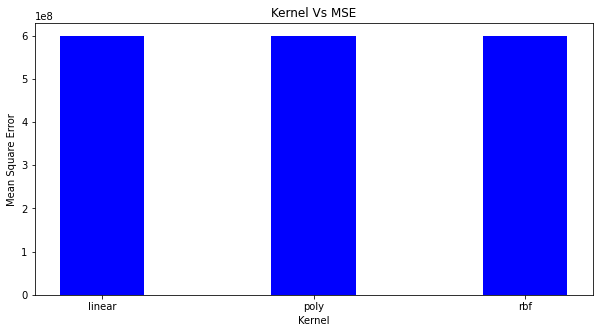

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Kernel")
plt.ylabel("Mean Square Error")
plt.title("Kernel Vs MSE")
plt.show()

In [ ]:
for i in range(0,4):
  print("Random State :", i)
  clf = svm.SVC(kernel="polynomial", random_state=i)
  y_pred = clf.fit(x_train, y_train).predict(x_test)
  print("ACCURACY:",accuracy_score(y_test, y_pred)*100)
  print()

(14000,)

In [ ]:
for i in [0.2, 0.4, 0.6, 0.8, 0.10]:
  data = {}
  print("C float :", i)
  clf = svm.SVR(kernel="poly", C = i)
  y_pred = clf.fit(x_train, y_train).predict(x_test)
  mse = np.mean((clf.predict(x_test) - y_test) ** 2)
  print("Mean squared error: %.2f" % np.mean((clf.predict(x_test) - y_test) ** 2))
  print('Variance score: %.2f' % clf.score(x_test, y_test))
  data[kern] = mse
  print()

C float : 0.2
Mean squared error: 599371870.50
Variance score: -1.78

C float : 0.4
Mean squared error: 599289174.14
Variance score: -1.78

C float : 0.6
Mean squared error: 599206484.16
Variance score: -1.78

C float : 0.8
Mean squared error: 599123800.57
Variance score: -1.78

C float : 0.1
Mean squared error: 599413221.08
Variance score: -1.78



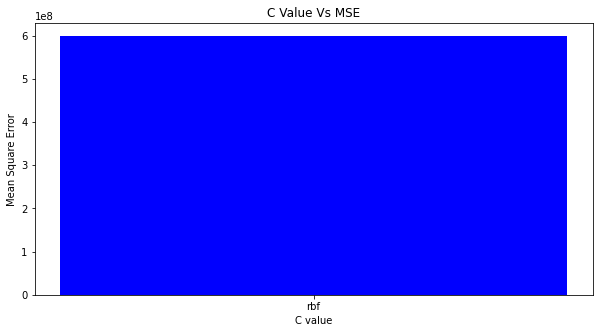

In [ ]:
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("C value")
plt.ylabel("Mean Square Error")
plt.title("C Value Vs MSE")
plt.show()